In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_excel('Linear Regression.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


We have to predict the Price of the house , how much other factors are affecting Price

##### Target Variable (Price) is Continous

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [20]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [21]:
df.shape

(21613, 5)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(21347, 5)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21347.0,541986.883918,368564.096080,75000.0,323900.00,450500.00,648000.0,7700000.0
sqft_living,21347.0,2086.289502,919.716435,290.0,1430.00,1920.00,2550.0,13540.0
bedrooms,21347.0,3.374994,0.932089,0.0,3.00,3.00,4.0,33.0
bathrooms,21347.0,2.119408,0.769485,0.0,1.75,2.25,2.5,8.0
floors,21347.0,1.495058,0.539468,1.0,1.00,1.50,2.0,3.5


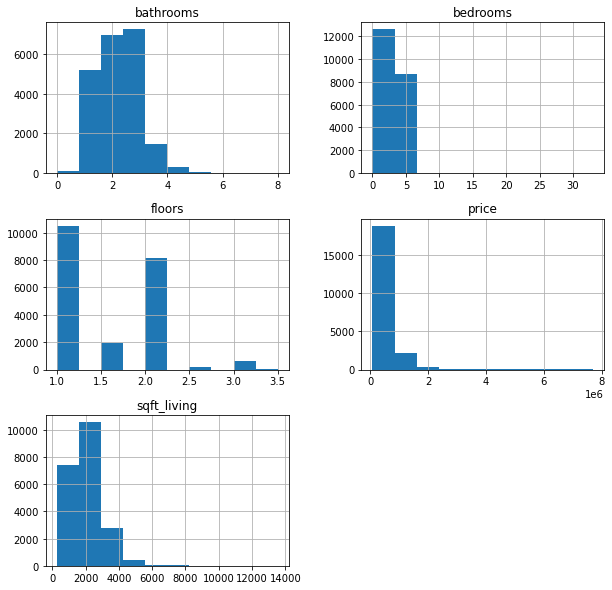

In [25]:
df.hist(figsize=(10,10))
plt.show()

#### Inference from Histogram:
    Bathrooms is Unimodal and has negative Skewness ie Mean < Median
    Bedrooms is Unimodal and has positive Skewness ie Mean > Median
    Price is Unimodal and has positive Skewness ie Mean > Median
    Sqft_living is Unimodal and has positive Skewness ie Mean > Median
    Floors is Multimodal

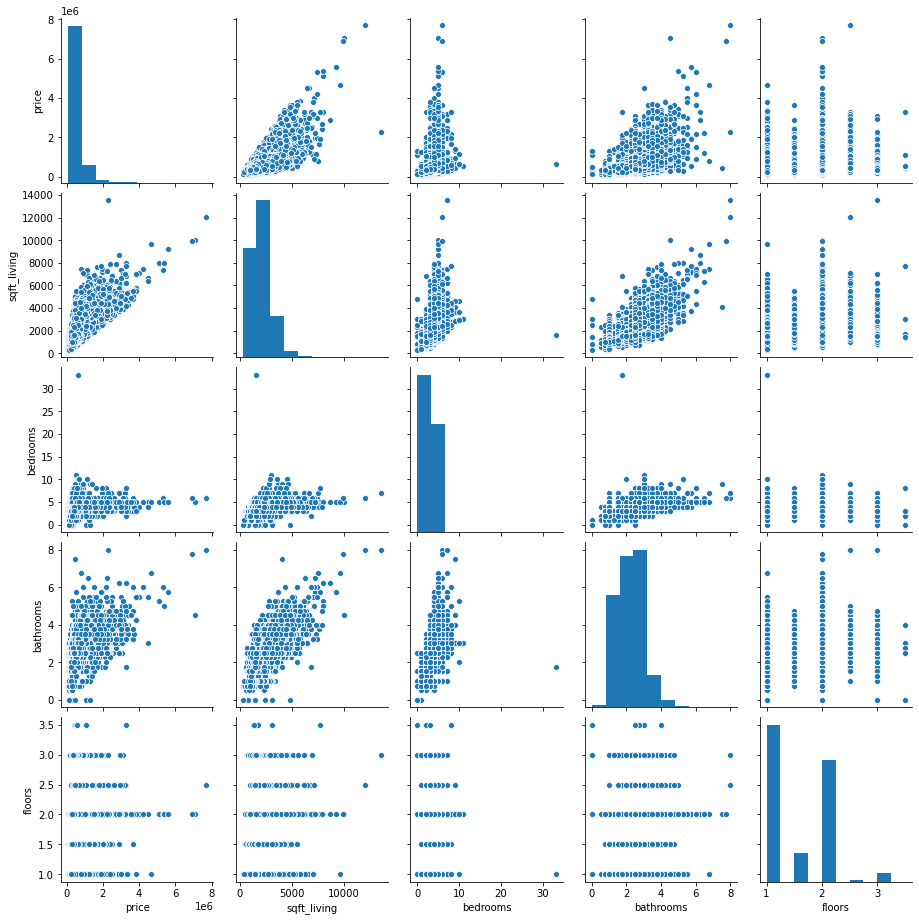

In [26]:
sns.pairplot(df)

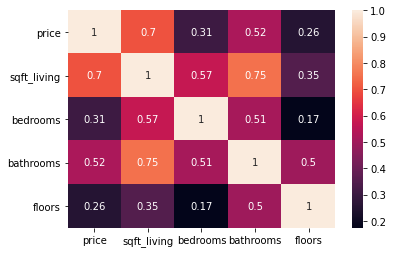

In [27]:
# Heat Map for correlation

sns.heatmap(df.corr(), annot=True);

#### Inference from Correlation Matrix:
The Target variable 'price' has :

    Strong correlation with area of living in square feet
    Moderate correlation with number of bathrooms and bedrooms
    almost No correlation with number of floors.

BoxPlot of  sqft_living


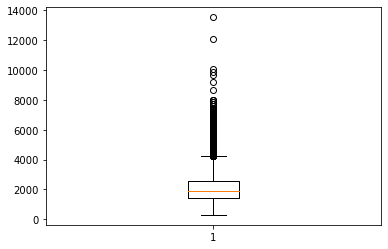

BoxPlot of  bedrooms


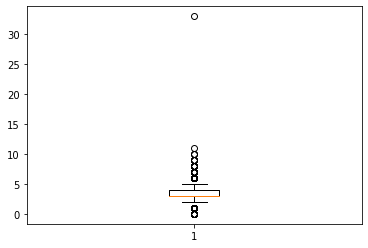

BoxPlot of  bathrooms


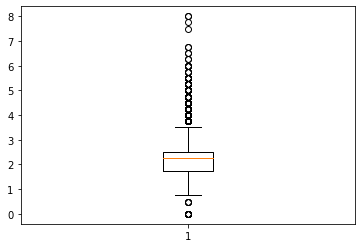

BoxPlot of  floors


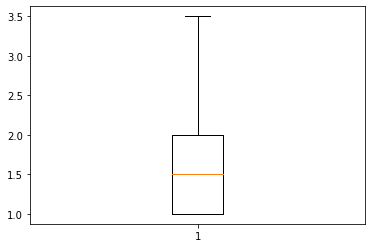

In [39]:
ind_var = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
for i in ind_var:
    print("BoxPlot of ", i)
    plt.boxplot(df[i])
    plt.show()

#### Inference from Boxplot
The Dependent Variable (Price) has many Outliers
    
    Square feet Living has many Outliers
    Bedrooms has Moderate Outliers but It also include an Extreme Outlier(which can be removed from dataset)
    Bathroms has Moderate Outliers
    Floors has No Outlier

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()

from scipy.stats import pearsonr

## Model 1
#### Price V/S area of living in square feet (sqft_living)

In [41]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [46]:
x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [48]:
y = df.iloc[:,0:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


#### Spliting Dataset into Training and Test Set

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

#### Fitting Linear Model 

In [54]:
lin_reg.fit(x_train, y_train)

LinearRegression()

#### Framing Equation

In [55]:
lin_reg.coef_

array([[278.03668853]])

In [56]:
lin_reg.intercept_

array([-41098.77718909])

#### Equation is:

###### price = - 41947.45007397 + 279.51011494 (sqft_living)

In [58]:
apred = lin_reg.predict(x_test)

#### Calculating R-square value and p value

In [59]:
RMSE = np.sqrt(mean_squared_error(y_test, apred))
r_square = r2_score(y_test, apred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.5044152561933744
The RMSE value is: 272404.5278852381


In [60]:
stats, p = pearsonr(df.price, df.sqft_living)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.7016345280645556 and p value is 0.0


#### Inference from Model1:

    R-square value is 0.50 suggesting that only about 50% of the variance in the target variable.
    p value is 0.0 which is less than 0.05 ie sqft_living is affecting Price of House

## Model 2
#### Price V/S Bedrooms

In [61]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [62]:
x = df.iloc[:,2:3]
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [63]:
y = df.iloc[:,0:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [66]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [67]:
lin_reg.coef_

array([[114477.95199852]])

In [68]:
lin_reg.intercept_

array([151655.35260813])

#### Equation is:

##### price = 151655.35260813 + 114477.95199852 (bedrooms)

In [69]:
apred = lin_reg.predict(x_test)

In [70]:
RMSE = np.sqrt(mean_squared_error(y_test, apred))
r_square = r2_score(y_test, apred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.10600476192453667
The RMSE value is: 365866.76520786487


In [71]:
stats, p = pearsonr(df.price, df.bedrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.3070483295375319 and p value is 0.0


#### Inference from Model2:

    R-square value is 0.10 suggesting that only about 10% of the variance in the target variable.
    p value is 0.0 which is less than 0.05 ie bedrooms is affecting Price of House

## Model 3
#### Price V/S Bathrooms

In [78]:
x = df.iloc[:,3:4]
x.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [79]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [81]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [82]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [21723.05742062]
Coefficient is:  [[243734.55031]]


#### Equation is:

##### price = 21723.05742062 +  243734.55031(bathrooms)


In [83]:
apred = lin_reg.predict(x_test)

In [84]:
RMSE = np.sqrt(mean_squared_error(y_test, apred))
r_square = r2_score(y_test, apred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.293158537208139
The RMSE value is: 325324.196895695


In [85]:
stats, p = pearsonr(df.price, df.bathrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.5247264065766462 and p value is 0.0


#### Inference from Model3:

    R-square value is 0.29 suggesting that only about 29% of the variance in the target variable.
    p value is 0.0 which is less than 0.05 ie bathrooms is affecting Price of House

## Model 4
#### Price V/S Floors

In [86]:
x = df.iloc[:,4:]
x.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [87]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [89]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [90]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [286158.65417922]
Coefficient is:  [[168412.82503818]]


#### Equation is:
##### price = 286158.65417922 + 168412.82503818(Floors)

In [91]:
apred = lin_reg.predict(x_test)

In [92]:
RMSE = np.sqrt(mean_squared_error(y_test, apred))
r_square = r2_score(y_test, apred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.0710087563054772
The RMSE value is: 372959.06561239687


In [93]:
stats, p = pearsonr(df.price, df.floors)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.25600337759857766 and p value is 1.4101167e-316


#### Inference from Model4:

    R-square value is 0.0 suggesting that only about 7% of the variance in the target variable.
    p value is 1.6e-316 which is less than 0.05 ie floors is affecting Price of House

## Model 5 (Multiple Linear Regression)
#### Price as Dependent Variable and all Other Variables as Independent Variable

In [99]:
x = df.iloc[:, 1:]
y = df.iloc[:, :1]

In [100]:
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [101]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [103]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [104]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [77850.01172701]
Coefficient is:  [[   308.39317356 -56954.41512582   5454.28748482   -915.29164238]]


#### Equation is:

##### price = 77850.01172701 + 308.39317356(sqft_living) - 56954.41512582(bedrooms) + 5454.28748482(bathrooms) - 915.29164238(floors)

In [106]:
apred = lin_reg.predict(x_test)

In [107]:
RMSE = np.sqrt(mean_squared_error(y_test, apred))
r_square = r2_score(y_test, apred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.5164426866546958
The RMSE value is: 269078.7093166195


#### Inference from Model5:

R-square value is 0.51 suggesting that only about 51% of the variance in the target variable.